# Based on VGG 11 architecture with Data Augmentation

---



---




In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2019) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, SeparableConvolution2D,  MaxPooling2D, AveragePooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

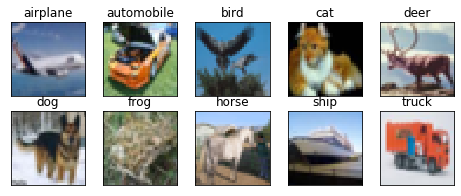

In [23]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [29]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3))) 
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_41 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_42 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 15, 15, 96)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50





390/390 [==============================] - 16s 41ms/step - loss: 1.9493 - acc: 0.2402 - val_loss: 1.6001 - val_acc: 0.4063
Epoch 2/50
390/390 [==============================] - 7s 18ms/step - loss: 1.4472 - acc: 0.4699 - val_loss: 1.1543 - val_acc: 0.5817
Epoch 3/50
390/390 [==============================] - 7s 19ms/step - loss: 1.1800 - acc: 0.5797 - val_loss: 0.9988 - val_acc: 0.6531
Epoch 4/50
390/390 [==============================] - 7s 18ms/step - loss: 1.0253 - acc: 0.6422 - val_loss: 0.8769 - val_acc: 0.6983
Epoch 5/50
390/390 [==============================] - 7s 19ms/step - loss: 0.9208 - acc: 0.6814 - val_loss: 0.8067 - val_acc: 0.7196
Epoch 6/50
390/390 [==============================] - 7s 18ms/step - loss: 0.8541 - acc: 0.7077 - val_loss: 0.7387 - val_acc: 0.7447
Epoch 7/50
390/390 [==============================] - 7s 18ms/step - loss: 0.7949 - acc: 0.7260 - val_loss: 0.7343 - val_acc: 0.7520
Epoch 8/50
390/390 [==============================] - 7s 18ms/s

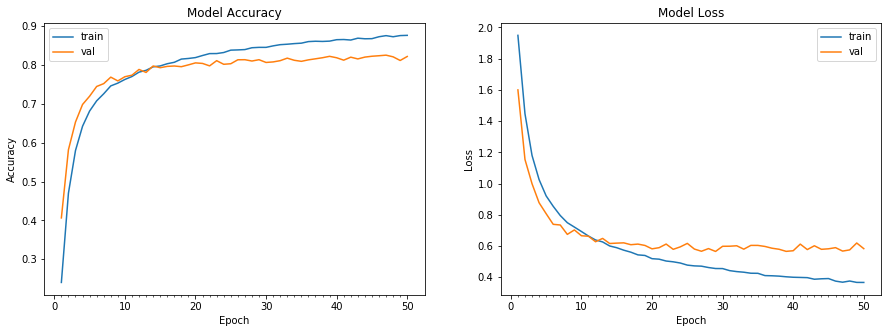

Accuracy on test data is: 82.19


In [30]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [0]:
# Define the model

model = Sequential()

model.add(SeparableConvolution2D(32, 3, 3, border_mode='same', input_shape=(32, 32, 3))) # Output dim : 32 x 32 x 32 ; Receptive field : 3 x 3
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(SeparableConvolution2D(64, 3, 3)) # Output dim : 30 x 30 x 64 ; Receptive Field : 5 x 5
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2))) # Output dim : 15 x 15 x 64 ; Receptive Field : 5 x 5
model.add(Dropout(0.1))

model.add(SeparableConvolution2D(128, 3, 3, border_mode='same')) # Output dim : 15 x 15 x 128 ; Receptive Field : 7 x 7 
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(SeparableConvolution2D(128, 3, 3)) # Output dim : 13 x 13 x 128 ; Receptive Field : 9 x 9
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2))) # Output dim : 6 x 6 x 128 ; Receptive Field : 9 x 9 
model.add(Dropout(0.1))

model.add(SeparableConvolution2D(192, 3, 3, border_mode='same')) # Output dim : 6 x 6 x 192 ; Receptive Field : 11 x 11
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(SeparableConvolution2D(192, 3, 3)) # Output dim : 4 x 4 x 192 ; Receptive Field : 13 x 13
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(AveragePooling2D(pool_size=(4, 4))) # Output dim : 1 x 1 x 192

model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(0.003), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(32, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(64, (3, 3))`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(128, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(128, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(192, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/i

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_7 (Separabl (None, 32, 32, 32)        155       
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
dropout_10 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
separable_conv2d_8 (Separabl (None, 30, 30, 64)        2400      
_________________________________________________________________
activation_8 (Activation)    (None, 30, 30, 64)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 30, 30, 64)       

Epoch 1/50

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
  1/390 [..............................] - ETA: 1:08 - loss: 0.8102 - acc: 0.7109

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=390, epochs=50)`


390/390 [==============================] - 43s 111ms/step - loss: 0.7792 - acc: 0.7287 - val_loss: 0.8093 - val_acc: 0.7381
Epoch 2/50

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
390/390 [==============================] - 43s 110ms/step - loss: 0.7377 - acc: 0.7420 - val_loss: 0.7455 - val_acc: 0.7555
Epoch 3/50

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
390/390 [==============================] - 43s 111ms/step - loss: 0.7002 - acc: 0.7560 - val_loss: 0.5949 - val_acc: 0.8012
Epoch 4/50

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
390/390 [==============================] - 43s 111ms/step - loss: 0.6787 - acc: 0.7648 - val_loss: 0.6122 - val_acc: 0.7937
Epoch 5/50

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
390/390 [==============================] - 43s 110ms/step - loss: 0.6625 - acc: 0.7682 - val_loss: 0.5958 - val_acc: 0.8030
Epoch 6/50

Epoch 00006: LearningRat

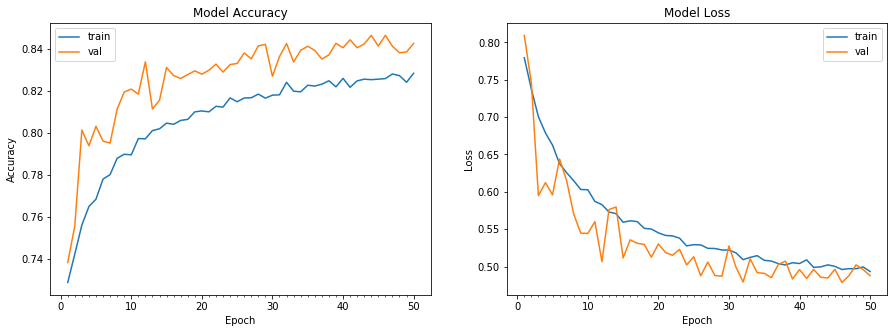

Accuracy on test data is: 84.24


In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
datagen = ImageDataGenerator(rotation_range=10,
		zoom_range=0.10,
		width_shift_range=0.2,
		height_shift_range=0.2,
		#shear_range=0.15,
		horizontal_flip=True)
		# fill_mode="nearest")

schedule = [LearningRateScheduler(lambda epoch: round(0.003 * 1/(1 + 0.319 * epoch), 10), verbose = 1)]
# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels),  verbose=1, callbacks = schedule)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))